In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [114]:
df = pd.read_csv('D:/Study/2021-2022 _ HK2/MKTG5883_DataMiningApp/Lab2/sales.csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [115]:
df.shape

(29922, 6)

In [116]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [117]:
df['ordered_at']= pd.to_datetime(df['ordered_at'])
df['price'] = pd.to_numeric(df['price'],errors = 'coerce')
df['line_total'] = pd.to_numeric(df['line_total'],errors = 'coerce')

In [118]:
df.dtypes

order_id               int64
name                  object
ordered_at    datetime64[ns]
price                float64
quantity               int64
line_total           float64
dtype: object

#### TODO: drop if duplicated or null

In [88]:
df[df.duplicated()].shape[0]

538

In [89]:
df.drop_duplicates(inplace = True)

In [90]:
df.isnull().sum()

order_id         0
name          1481
ordered_at       0
price            0
quantity         0
line_total       0
dtype: int64

In [91]:
df[df['name'].isnull()].head()

,order_id,name,ordered_at,price,quantity,line_total
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
6,10002,NaN,2018-01-01 12:23:09,3.0,3,9.0
27,10007,NaN,2018-01-01 15:03:17,2.5,1,2.5
77,10026,NaN,2018-01-02 03:25:40,0.5,2,1.0
88,10031,NaN,2018-01-02 05:45:48,3.5,3,10.5


In [92]:
df.dropna(inplace = True)
df

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0
...,...,...,...,...,...,...
29817,19997,"""CONE"" Waffle Cone",2018-07-28 17:40:40,4.0,3,12.0
29818,19997,"""SORBET"" Blood Orange",2018-07-28 17:40:40,2.5,3,7.5
29819,19998,"""SORBET"" Lychee",2018-07-28 18:21:44,3.0,1,3.0
29820,19998,"""ICE CREAM"" Rocky Road",2018-07-28 18:21:44,3.5,1,3.5


#### Sanity check for value ranges and to check assumptions

In [93]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

28

In [94]:
df[df['line_total'] < 0].shape[0]

279

# TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [95]:
df.drop(df[df['line_total'] < 0].index, inplace = True)

In [96]:
for i in df.index:
    if (df['price'][i] * df['quantity'][i]) != df['line_total'][i]:
        df['line_total'][i] = df['price'][i] * df['quantity'][i]

<ipython-input-96-021ef0281794>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['line_total'][i] = df['price'][i] * df['quantity'][i]


In [97]:
df.describe()

,order_id,price,quantity,line_total
count,27624.000000,27624.000000,27624.000000,27624.000000
mean,14993.783051,2.511711,2.000724,5.028743
std,2888.516649,1.059244,0.819432,3.085410
min,10000.000000,0.500000,1.000000,0.500000
25%,12501.750000,1.500000,1.000000,2.500000
50%,14973.000000,2.500000,2.000000,4.500000
75%,17507.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [98]:
df['category'] = df['name']
pattern1 = re.compile(r'\b"')
df.dropna(inplace = True)
for i in df.index:
    new = df['name'][i]
    matches = pattern1.search(str(new))
    a = matches.span()[0]
    df['category'][i] = df['name'][i][1:a]
    l = len(df['name'][i])
    df['name'][i] = df['name'][i][a+1:l]

<ipython-input-98-9c61611647dc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'][i] = df['name'][i][1:a]
<ipython-input-98-9c61611647dc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['name'][i] = df['name'][i][a+1:l]


In [100]:
df

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET
...,...,...,...,...,...,...,...
29817,19997,Waffle Cone,2018-07-28 17:40:40,4.0,3,12.0,CONE
29818,19997,Blood Orange,2018-07-28 17:40:40,2.5,3,7.5,SORBET
29819,19998,Lychee,2018-07-28 18:21:44,3.0,1,3.0,SORBET
29820,19998,Rocky Road,2018-07-28 18:21:44,3.5,1,3.5,ICE CREAM


In [79]:
df.head()

,order_id,name,ordered_at,price,quantity,line_total,category
0,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,3,10.5,ICE CREAM
1,10000,Peanut Fudge,2018-01-01 11:30:00,3.5,1,3.5,ICE CREAM
2,10001,Raspberry,2018-01-01 12:14:54,2.5,2,5.0,SORBET
4,10001,Dipped Waffle Cone,2018-01-01 12:14:54,3.5,1,3.5,CONE
5,10002,Lychee,2018-01-01 12:23:09,3.0,1,3.0,SORBET


#### Analysis, finally!

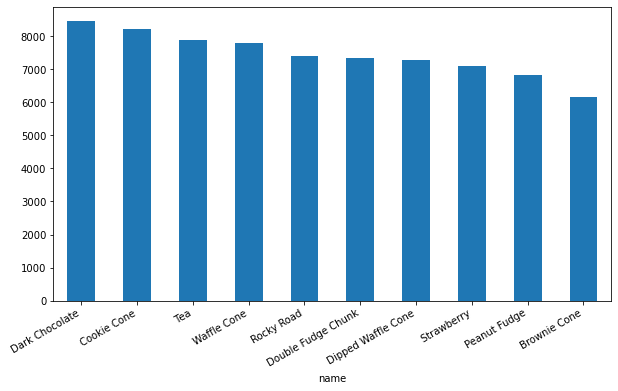

In [79]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('name')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()